In [1]:
import sys
import os


SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from simon_device import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'lines.linewidth':3})
sns.set_style('white')

ACT-R connection has been started.


In [2]:
param_set={'valid_cue_percentage':0.8, 'n_trials':20, 'dat':0.04}
df_model, df_param= run_simulation(log='post_effect_s100_', n_simulation=100, n_session=7, param_set=param_set)
print('Epoch', df_model['epoch'].max())

......>>> LOAD SIMULATION DATA <<<......
[['post_effect_s100_230615']]
Epoch 100


In [3]:
# Boksem post-error slowing data
df_bokesem_post = pd.DataFrame({'interval':(1,2,3,4,5,6,7), 
                                'response_time':(457, 463, 460, 464, 473, 485, 463), 
                                'post-correct':(437, 443, 436, 443, 450, 460, 440), 
                                'post-error':(463, 464, 457, 452, 453, 457, 449)}).melt(id_vars=('interval'), var_name='pre_trial_accuracy', value_name='response_time')

/tmp/ipykernel_17286/4270179329.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_bokesem_post = pd.DataFrame({'interval':(1,2,3,4,5,6,7),


In [4]:
df_model['response_time'] = df_model['response_time'] * 1000

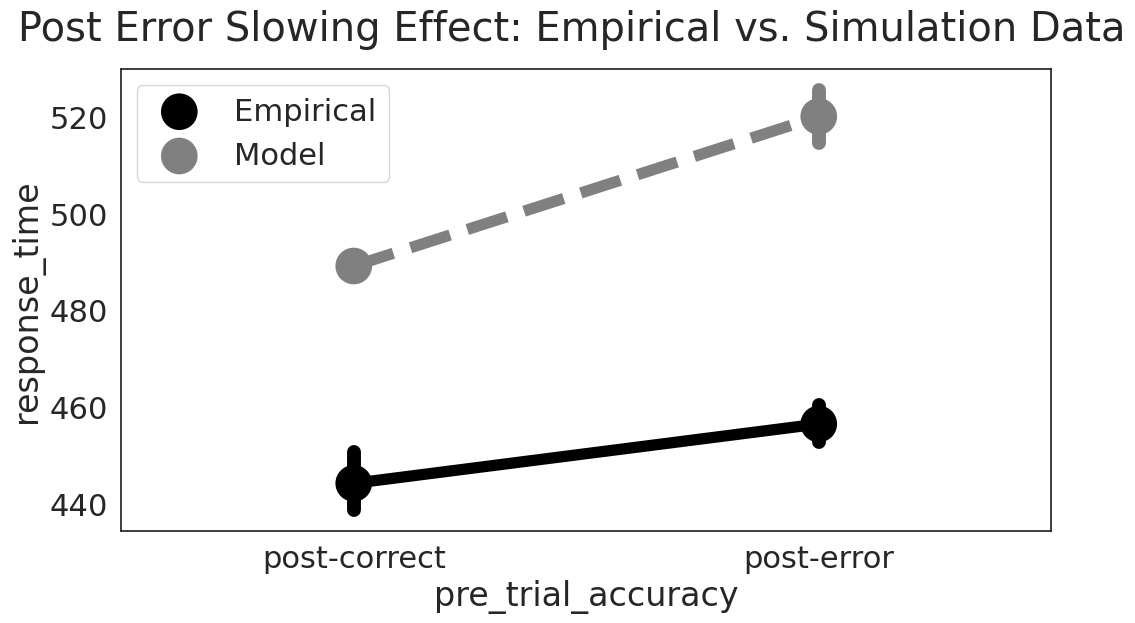

In [11]:
fig, ax = plt.subplots(1, figsize=(12,6))
fig.suptitle('Post Error Slowing Effect: Empirical vs. Simulation Data')
sns.pointplot(data=df_bokesem_post, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', scale=1.5, errwidth=10, join=True, label='Empirical', ax=ax)
sns.pointplot(data=df_model, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='gray', linestyles='--', scale=1.5, errwidth=10, label='Model', ax=ax)
ax.legend()
plt.show()

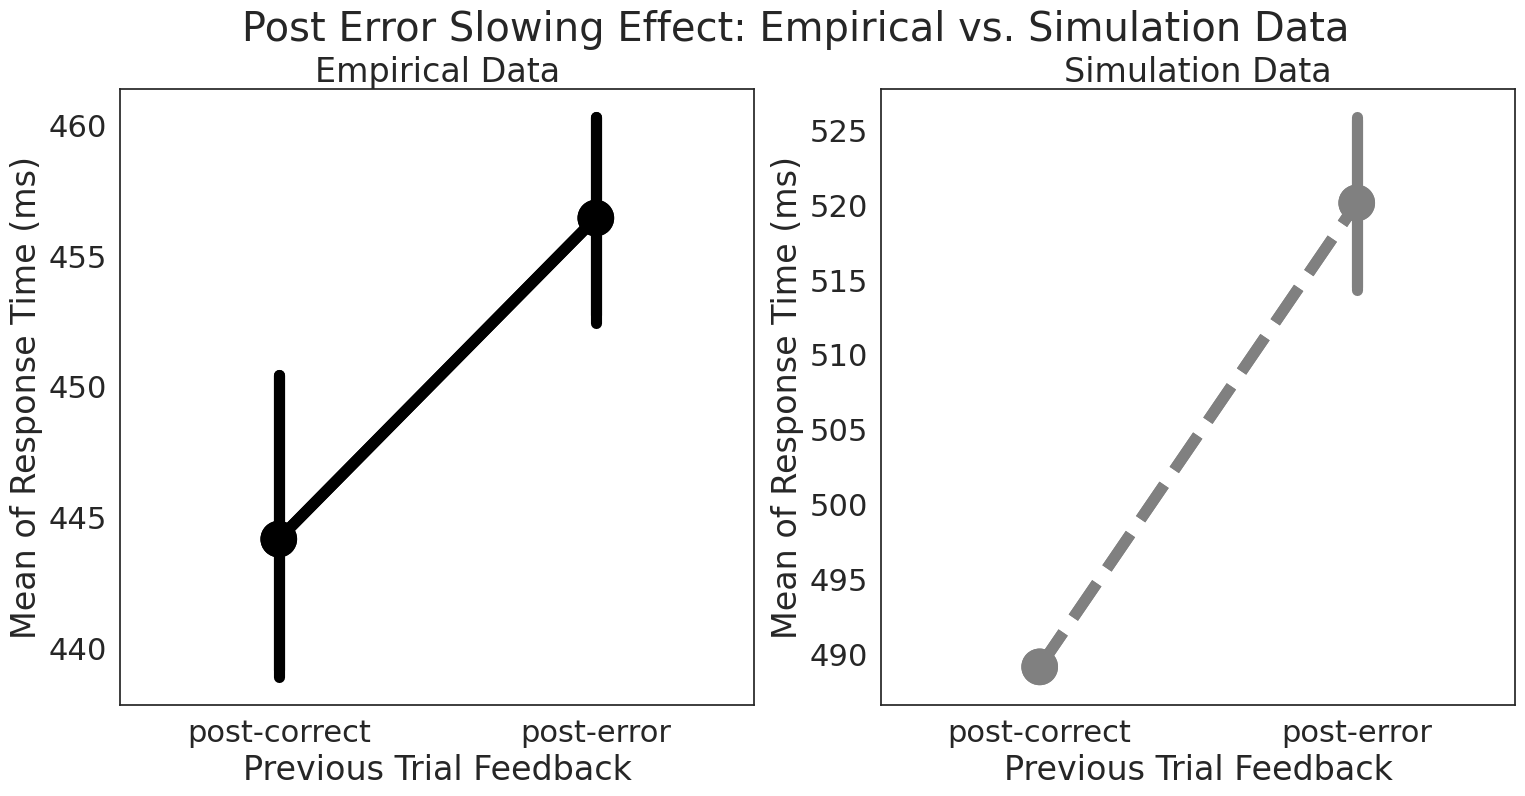

In [6]:
fig, axes = plt.subplots(1,2, figsize=(18,8))
fig.suptitle('Post Error Slowing Effect: Empirical vs. Simulation Data')
sns.pointplot(data=df_bokesem_post, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', scale=1.5, errwidth=8,join=True, ax=axes[0])
sns.pointplot(data=df_bokesem_post, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', scale=1.5, errwidth=8,join=True, ax=axes[0])

sns.pointplot(data=df_model, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='gray', linestyles='--', scale=1.5, errwidth=8,ax=axes[1])
sns.pointplot(data=df_model, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='gray', linestyles='--', scale=1.5, errwidth=8,ax=axes[1])

axes[0].set_title('Empirical Data')
axes[1].set_title('Simulation Data') 

for ax in axes:
    ax.set_xlabel('Previous Trial Feedback')
    ax.set_ylabel('Mean of Response Time (ms)')
plt.show()

In [7]:
df_param.drop(columns={'seed'}).drop_duplicates()

,ans,le,lf,mas,bll,egs,alpha,imaginal-activation,dat,motivation,init_cost,update_cost,valid_cue_percentage,n_trials,session
0,0.2,0.63,1.0,4.0,0.1,0.2,0.4,3.0,0.04,1,0.05,False,0.8,20,1
1,0.2,0.63,1.0,4.0,0.1,0.2,0.4,3.0,0.04,1,0.05,False,0.8,20,2
2,0.2,0.63,1.0,4.0,0.1,0.2,0.4,3.0,0.04,1,0.05,False,0.8,20,3
3,0.2,0.63,1.0,4.0,0.1,0.2,0.4,3.0,0.04,1,0.05,False,0.8,20,4
4,0.2,0.63,1.0,4.0,0.1,0.2,0.4,3.0,0.04,1,0.05,False,0.8,20,5
5,0.2,0.63,1.0,4.0,0.1,0.2,0.4,3.0,0.04,1,0.05,False,0.8,20,6
6,0.2,0.63,1.0,4.0,0.1,0.2,0.4,3.0,0.04,1,0.05,False,0.8,20,7


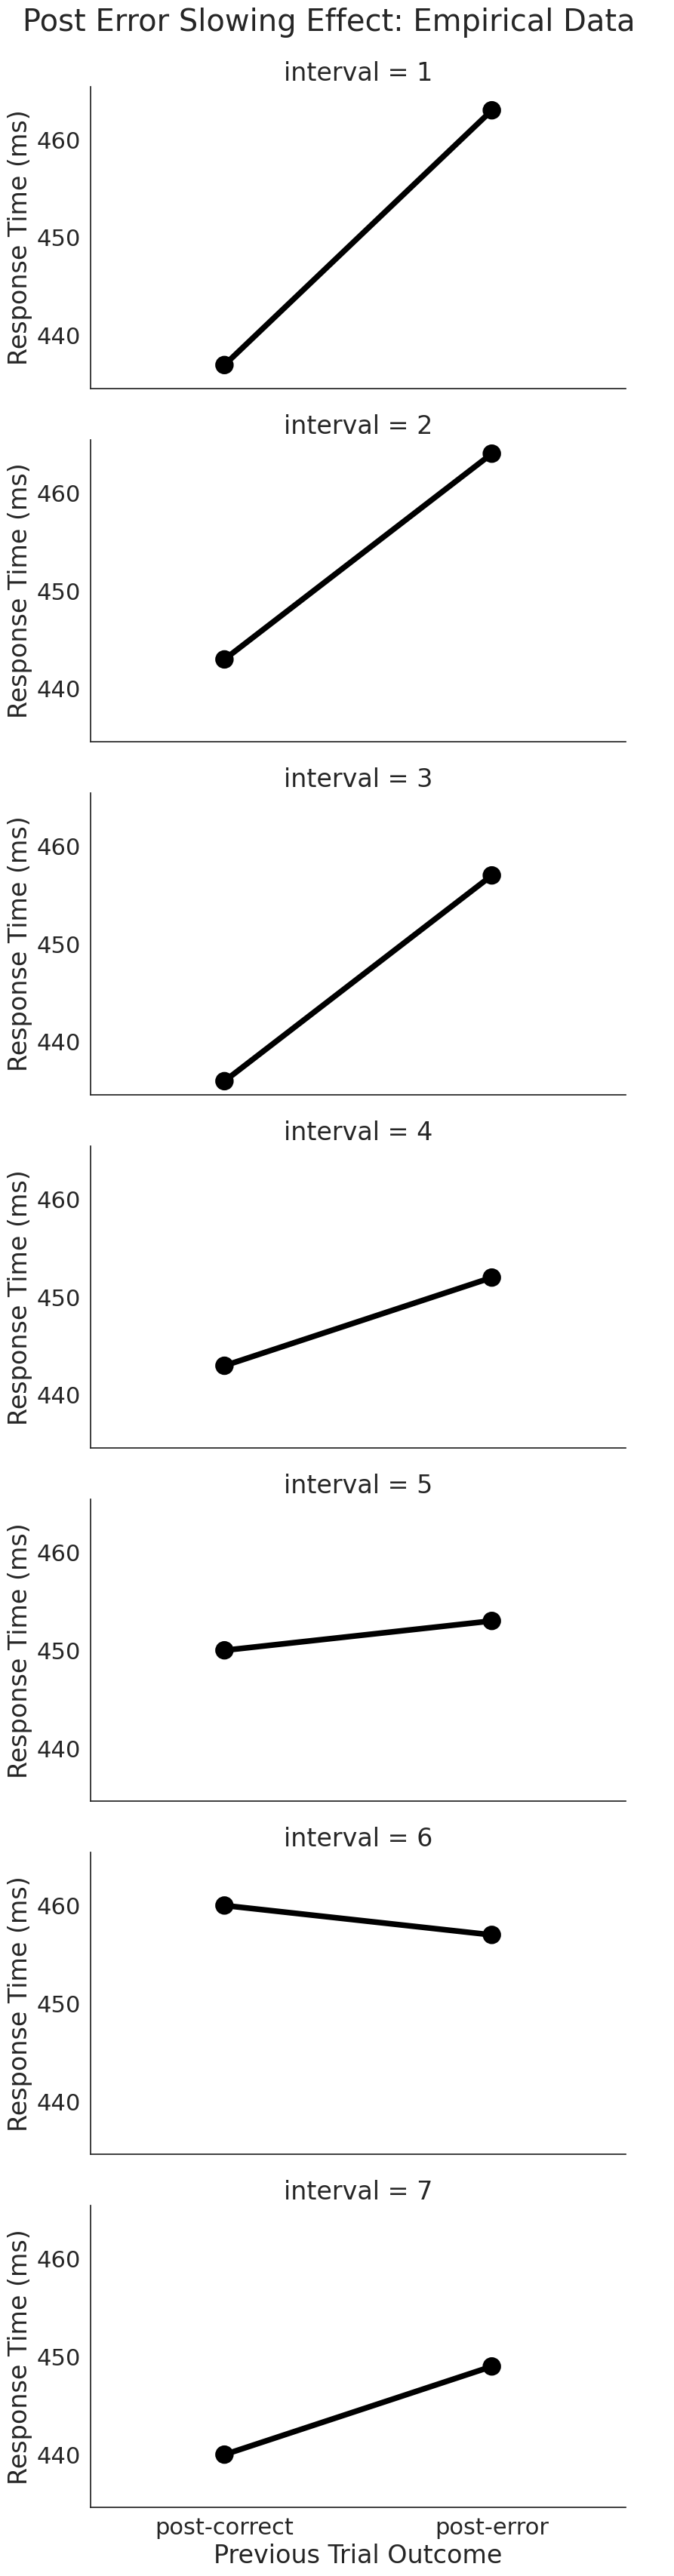

In [8]:
g = sns.FacetGrid(df_bokesem_post, height=5, aspect=1.8, row='interval')
g.map_dataframe(sns.pointplot, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', join=True)

g.set_xlabels(label='Previous Trial Outcome', clear_inner=True)
g.set_ylabels(label='Response Time (ms)', clear_inner=True)
g.add_legend() 
g.tight_layout()
g.fig.subplots_adjust(top=0.95)  # adjust the Figure in rp
g.fig.suptitle('Post Error Slowing Effect: Empirical Data')
plt.show()

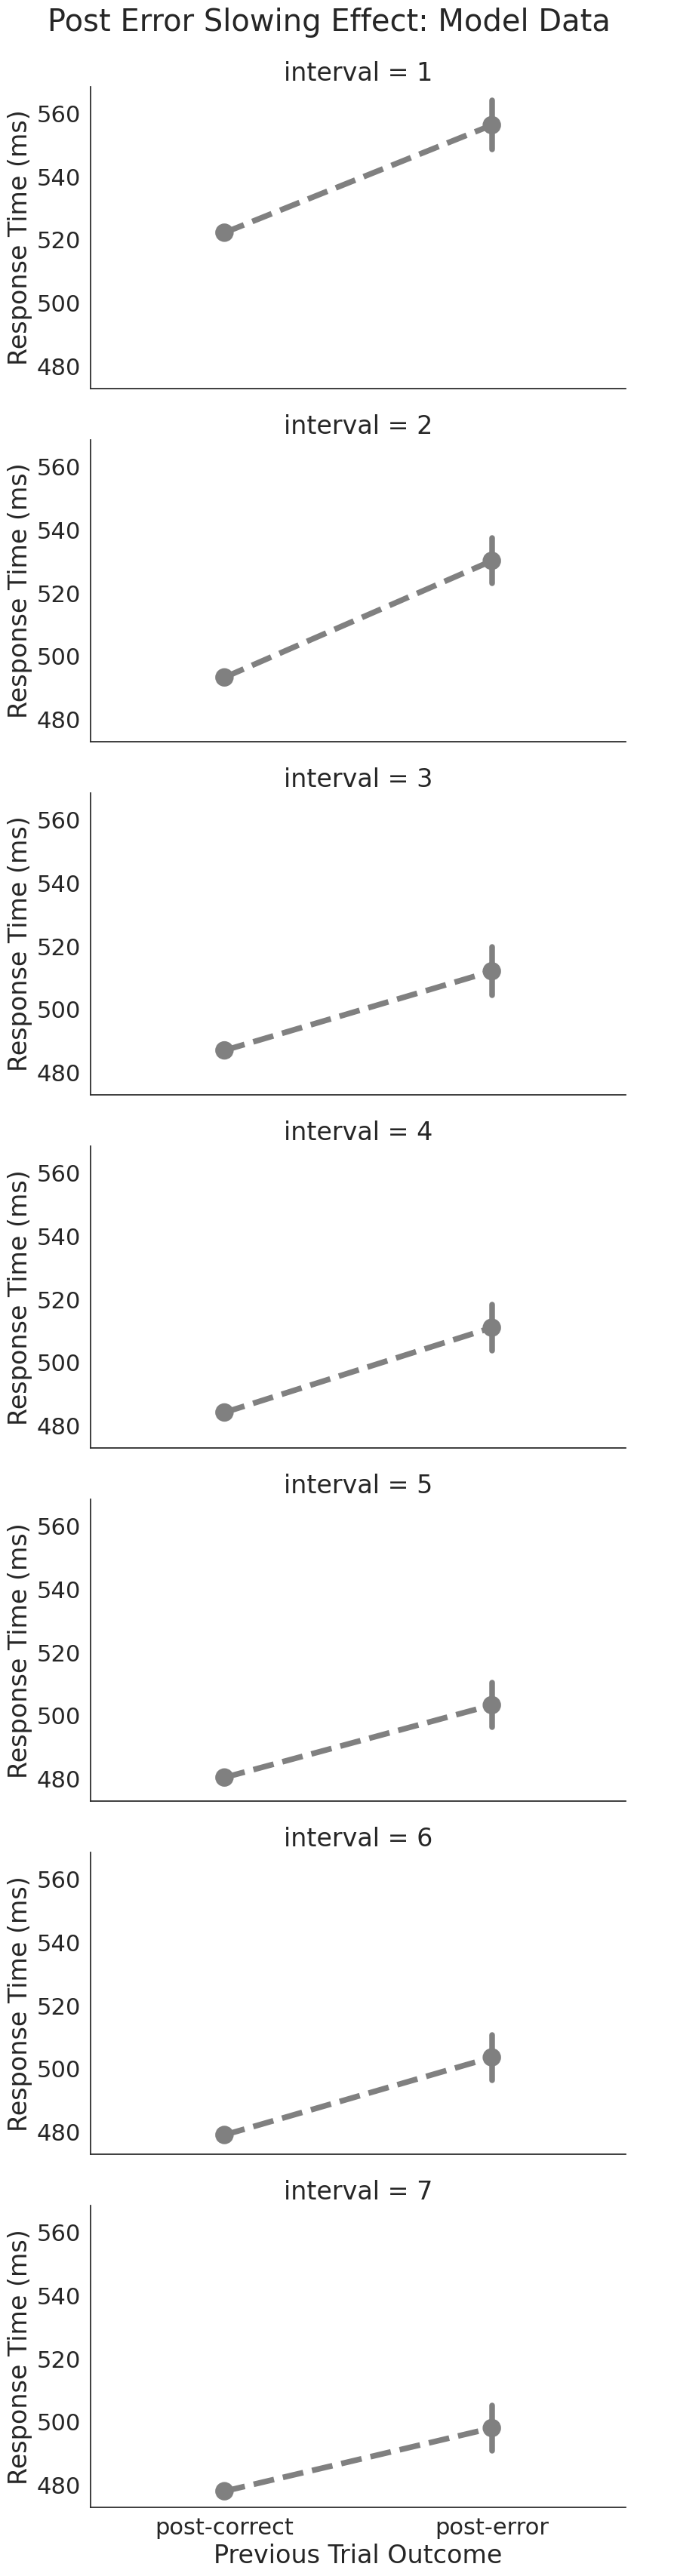

In [9]:
df_model['interval'] = df_model['session']
g = sns.FacetGrid(df_model, height=5, aspect=1.8, row='interval')
g.map_dataframe(sns.pointplot, x='pre_trial_accuracy', y='response_time', errorbar='se', order=['post-correct', 'post-error'], color='gray', linestyles='--', join=True)

g.set_xlabels(label='Previous Trial Outcome', clear_inner=True)
g.set_ylabels(label='Response Time (ms)', clear_inner=True)
g.add_legend() 
g.tight_layout()
g.fig.subplots_adjust(top=0.95)  # adjust the Figure in rp
g.fig.suptitle('Post Error Slowing Effect: Model Data') 
plt.show()